<a href="https://colab.research.google.com/github/linlills/NeuralNetworks/blob/main/Vdovina_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормализация входных данных (диапазон от 0 до 1)
x_train = x_train/255
x_test = x_test/255

# типовое преобразование значений y в вектор длиной 10 элементов
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


In [164]:
# Входной слой с 784 входами и одним смещением, скрытый слой с 128 нейронами и функцией активации relu, выходной слой с 10 нейронами и функцией активации softmax
model = keras.Sequential([Flatten(input_shape=(28,28,1)), Dense(128, activation='relu'), Dense(10, activation='softmax')])
# print(model.summary())
# оптимизация adam, функция потерь - перекрёстная энтропия (для классификации) 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2888 - accuracy: 0.9175 - val_loss: 0.1565 - val_accuracy: 0.9556
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1280 - accuracy: 0.9621 - val_loss: 0.1121 - val_accuracy: 0.9660
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9755 - val_loss: 0.1031 - val_accuracy: 0.9699
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0878 - val_accuracy: 0.9753


In [165]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9774


[0.07754877954721451, 0.977400004863739]

[[9.9967515e-01 6.3834507e-09 1.8390169e-04 1.5454081e-07 8.2894802e-12
  7.2819898e-06 8.1246031e-07 2.5495589e-07 7.6843260e-10 1.3236472e-04]]
Сеть распознала: 0


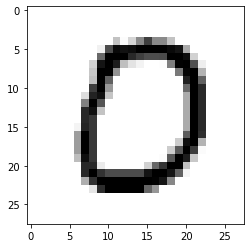

In [195]:
n=10
x=np.expand_dims(x_test[n], axis=0)
res=model.predict(x)
print(res)
print(f"Сеть распознала: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [167]:
pred=model.predict(x_test)
pred=np.argmax(pred, axis=1)

print(pred.shape)
print(pred[:20]) # то, что предсказывает сеть 
print(y_test[:20]) # вектор правильных значений

# выделение неверных результатов
mask=pred==y_test # поэлементное сравнение векторов
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape) # количество неверных распознаваний 

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True False  True]
(226, 28, 28)


In [168]:
# Вывод первых 10 неверных результатов распознавания
#for i in range(10):
 # print("Значение сети: "+str(p_false[i]))
  #plt.imshow(x_false[i], cmap=plt.cm.binary)
  #plt.show()

In [169]:
from google.colab import files
from PIL import Image
files.upload()

Saving 5_2.png to 5_2.png


{'5_2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x02\x00\x00\x00\xfdoH\xc3\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\x018IDATHK\xd5\xd4\xbd\x8eEP\x14\x86a\nQ\xa8\xd4ZjQ(%d\x8aiu.@\xa9\x95\xd0\x9fD\xe9\x06\x14\x1a\xbd\xc2\x05\xb84\xf3\xe5\xece\x06\xfb\xe70s\x14\xf3\x94;{\xbd\x85\x9f\xa5-7\xf8\xa7\xd1\xae\xeb>\xaf\xc8\xb2l\x1cG\x1a\xde\xd8E\x8b\xa2\xd0\xae\xeb\xfb\x9e\xe6Wo\x88\xc2\xa1+\x8d\x06A\xf0qZUU\x94x\x92F\x1f\x8f\x07\x9d^w\x7f\xb4,KJj\x9a\xe7y\xf4\x8e\xf7\x92$\xa9\xeb\x9a\x06$vQp]\x97\xaaJy\x9e\xd3\x80\xc81\n\'\xbb\xbe\xef\xd3\x00G\x10\x854M\xc30\xa4W+\xa2\xeb:\xbaq\x1c\xd3\xc0\x9e8\xfa\xd2\xf7+\x15>\x87\xbfFa\x18\x06:]\xbd!\xca\x7f|?\xd1y\x9e\x85\xdbA\xe8l\x94\xdd\xe3\xb7\x83\xd0\xb5(\xbc\xecbCb3\xb0\xcbp*\n\x8a\xe7p(\x82*\xba\xfdG\xf9{\x0c_\x04U\x14l\xdbf\xf7\xa2(\xa2\xa3\x8d\xb6m\xf9"N\xa6i\xa2\x1b\xab]\x14\x0c\xc3`\xb7\x1d\xc7\xa1\

In [170]:
!ls

 0_1.png   1_2.png   2.png	  4.png     7.png     sample_data
 0.png	   1_3.png  '4 (1).png'   5_2.png   8_1.png
 1_1.png   1.png     4_1.png	  6_2.png   9_2.png


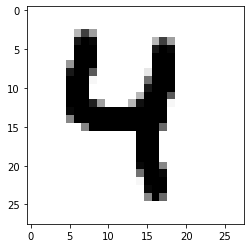

In [193]:
from tensorflow.keras.preprocessing import image
#Путь к файлу
img_path = '4.png'
#Загрузка изображения, размер 28х28, формат - в оттенках серого
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
#Вывод изображения
plt.imshow(img.convert('RGBA'))
plt.show()

In [194]:
# Преобразование изображения в массив
xx = image.img_to_array(img)
# Массив -> вектор
xx = xx.reshape(1, 784)
# Инверсия изображения (белое на чёрном фоне)
xx = 255 - xx
# Нормализация изображения
xx /= 255

#Распознавание изображения
prediction = model.predict(xx)
#Вывод результата
print(prediction)
print(f"Сеть распознала: {np.argmax(prediction)}")

model.evaluate(xx,prediction)

[[1.3478887e-10 1.4991485e-04 4.5248048e-06 4.8452000e-07 9.9977368e-01
  8.0155630e-08 2.3892073e-06 4.1024716e-05 2.7734763e-05 1.4107357e-07]]
Сеть распознала: 4
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000


[0.0023489808663725853, 1.0]